## 🧩 Shared Notebook: Comparing PDF and ECDF (SciPy vs. Statsmodels)

In [1]:
# Setup and Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from scipy.stats import norm
from utils.pdf_ecdf_utils import (
    get_pdf,
    run_goodness_of_fit_tests,
    compute_manual_ecdf,
    compute_statsmodels_ecdf
)
from utils.viz_utils import (
    plot_ecdf_comparison_manual_vs_stats,
    save_and_show_plot
)

# Constants
EXPORT_PLOTS = Path("../exports/plots/shared_pdf_ecdf")
EXPORT_TABLES = Path("../exports/tables/shared_pdf_ecdf")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 🔹 Step 1: Data Loading

In [2]:
# Load Synthetic Data
df = pd.read_csv("../synthetic_data/exports/mixed_distributions.csv")
data = df["gamma"]

## 🔹 Step 2: Plot and Overlay

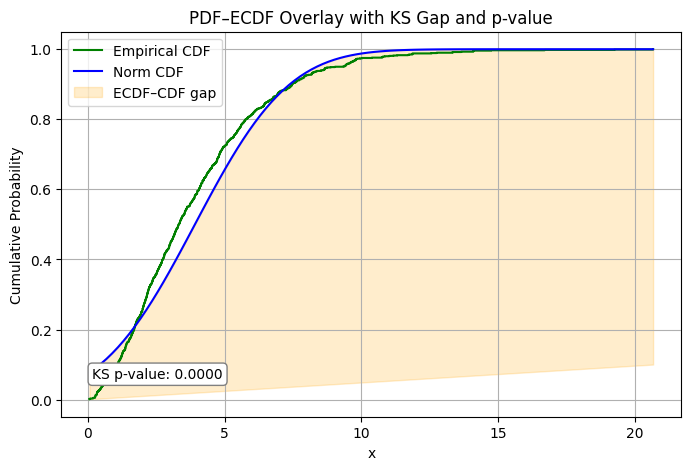

In [3]:
from utils.pdf_ecdf_utils import plot_pdf_ecdf_overlay

# Enhanced Overlay with Shading and KS-test p-value
fig = plot_pdf_ecdf_overlay(
    data,
    norm,
    title="PDF–ECDF Overlay with KS Gap and p-value",
    save_path=EXPORT_PLOTS / "pdf_ecdf_overlay_ks.png"
)


## 🔹 Step 3:  Multiple Distribution Comparison (Gamma, Normal, LogNorm)

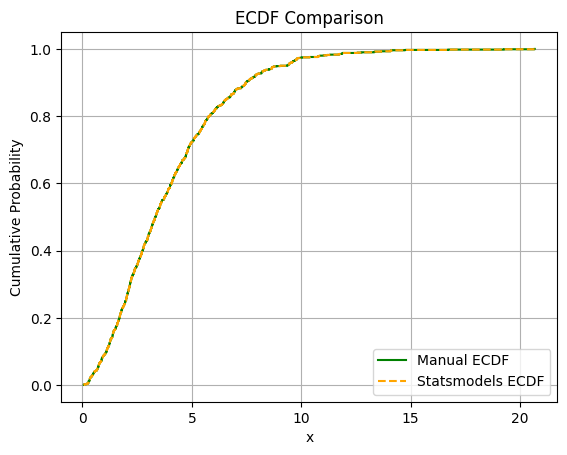

In [4]:
# ECDF: Manual vs Statsmodels
x_manual, y_manual = compute_manual_ecdf(data)
x_sm, y_sm = compute_statsmodels_ecdf(data)

fig_ecdf = plot_ecdf_comparison_manual_vs_stats(x_manual, y_manual, x_sm, y_sm)
save_and_show_plot(fig_ecdf, EXPORT_PLOTS / "ecdf_comparison.png")

## 🔹 Step 4: ECDF against multiple distributions

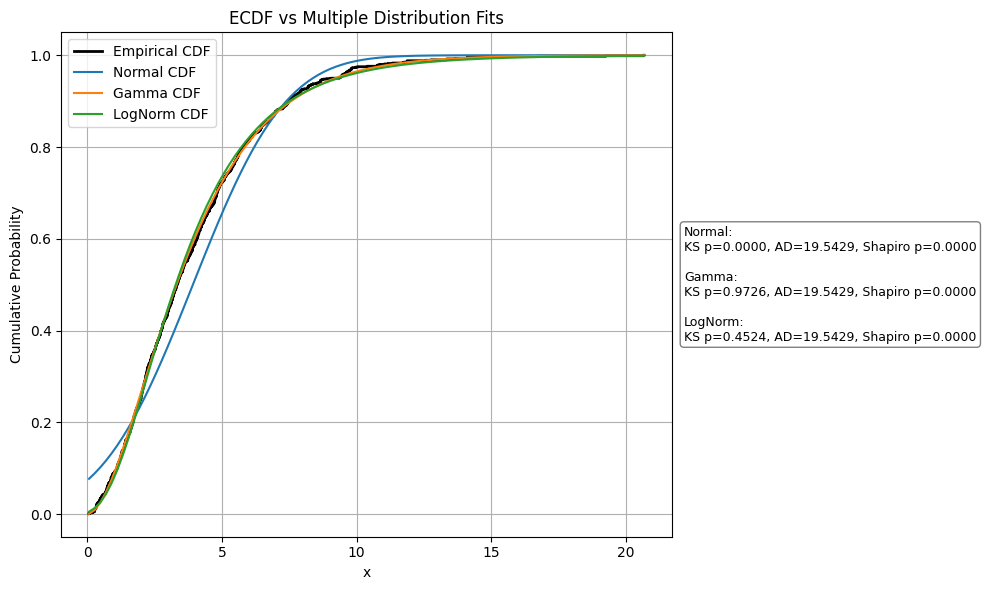

In [5]:
from utils.pdf_ecdf_utils import plot_enhanced_ecdf_comparison
from scipy.stats import norm, gamma, lognorm

# Compare ECDF against multiple distributions
fig = plot_enhanced_ecdf_comparison(
    data,
    dist_list=[norm, gamma, lognorm],
    dist_labels=["Normal", "Gamma", "LogNorm"],
    title="ECDF vs Multiple Distribution Fits",
    save_path=EXPORT_PLOTS / "ecdf_multiple_distributions.png"
)

In [6]:
# Run goodness-of-fit tests
results = []
for dist, label in zip([norm, gamma, lognorm], ["Normal", "Gamma", "LogNorm"]):
    test_res = run_goodness_of_fit_tests(data, dist)
    test_res["Distribution"] = label
    results.append(test_res)

# Convert to DataFrame
df_results = pd.DataFrame(results)

# ✅ Export only CSV (avoid markdown dependency)
df_results.to_csv(EXPORT_TABLES / "fit_test_results.csv", index=False)

# Display results
display(df_results)

,KS_stat,KS_p,AD_stat,Shapiro_p,Distribution
0,0.091603,9.417042e-08,19.542905,1.313443e-24,Normal
1,0.015182,9.726063e-01,19.542905,1.313443e-24,Gamma
2,0.026985,4.524291e-01,19.542905,1.313443e-24,LogNorm


## 🔹 Step 5: Summary of Goodness-of-Fit Tests

In [7]:
# Summary of Goodness-of-Fit Tests (Safe Markdown Export Without Tabulate)
summary_md_path = EXPORT_TABLES / "fit_test_results_summary.md"

with open(summary_md_path, "w") as f:
    f.write("# 📊 PDF vs ECDF Goodness-of-Fit Summary\n\n")
    
    # Write table header manually
    headers = " | ".join(df_results.columns)
    f.write(f"| {headers} |\n")
    f.write(f"| {' | '.join(['---'] * len(df_results.columns))} |\n")
    
    # Write table rows
    for _, row in df_results.iterrows():
        f.write("| " + " | ".join(map(str, row.values)) + " |\n")

print(f"✅ Summary exported to {summary_md_path}")

✅ Summary exported to ../exports/tables/shared_pdf_ecdf/fit_test_results_summary.md


## 🧠 Key Takeaways
- ECDF is a simple, powerful way to visualize empirical data distribution.
- PDF overlays help check theoretical fit visually.
- Manual vs Statsmodels ECDF shows implementation differences but similar results.
- Goodness-of-fit tests (KS, Anderson-Darling, Shapiro-Wilk) quantify how well data follows each distribution.
- Combining visual overlays and statistical tests gives a robust diagnostic toolkit.

## ✅ Summary
In this notebook, we have:

- Loaded gamma-distributed data
- Compared PDF overlays vs empirical ECDF
- Plotted manual vs statsmodels ECDF
- Tested Normal, Gamma, and LogNorm fits
- Exported plots and markdown summaries